In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels 
    
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        
        if metric == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis=1)
        elif metric == 'l2':
            distances = np.sqrt(np.sum(((self.train_images - test_image) ** 2), axis=1))
        else:
            raise Exception("Metric not implemented!")
        
        sorted_indices = distances.argsort()
        
        nearest_indices = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_indices]
        
        return np.bincount(nearest_labels).argmax()
    
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        predicted_labels = [self.classify_image(image, num_neighbors, metric) for image in test_images]
        
        return np.array(predicted_labels)
    

In [11]:
def accuracy_score(ground_truth_labels, predicted_labels):
    return np.mean(ground_truth_labels == predicted_labels)

In [16]:
train_images = np.loadtxt("data/train_images.txt")
train_labels = np.int32(np.loadtxt("data/train_labels.txt"))

In [19]:
test_images = np.loadtxt("data/test_images.txt")
test_labels = np.int32(np.loadtxt("data/test_labels.txt"))

In [22]:
knn_classifier = KnnClassifier(train_images, train_labels)

In [23]:
predicted_labels = knn_classifier.classify_images(test_images, num_neighbors=3, metric="l2")

In [24]:
acc = accuracy_score(test_labels, predicted_labels)
print(acc)

0.898


In [28]:
def get_accuracies(train_images, train_labels, test_images, test_labels, metric="l2"):
    knn_classifier = KnnClassifier(train_images, train_labels)
    
    return [accuracy_score(test_labels, knn_classifier.classify_images(test_images, num_neighbors=num, metric=metric)) for num in [1, 3, 5, 7, 9]]
        
    

In [29]:
acc_l2 = get_accuracies(train_images, train_labels, test_images, test_labels, metric="l2")

In [31]:
acc_l1 = get_accuracies(train_images, train_labels, test_images, test_labels, metric="l1")

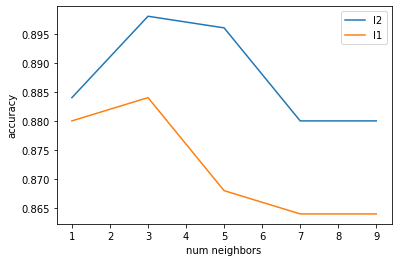

In [34]:
plt.plot([1, 3, 5, 7, 9], acc_l2)
plt.plot([1, 3, 5, 7, 9], acc_l1)
plt.legend(['l2', 'l1'])
plt.xlabel("num neighbors")
plt.ylabel("accuracy")
plt.show()